# This is a homework for the first week of MLOps Zoomcamp
#### https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/cohorts/2025/01-intro/homework.md

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

## Q1. Downloading the data

In [3]:
yellow_jan = pd.read_parquet('./data/yellow_tripdata_2023-01.parquet')
yellow_feb = pd.read_parquet('./data/yellow_tripdata_2023-02.parquet')

print(yellow_jan.shape)

(3066766, 19)


## Q2. Computing duration
## Q3. Dropping outliers
For simplicity and organize, I will put everything in preprocessing_data

In [4]:
categorical_features = ['PULocationID', 'DOLocationID']
target = 'duration'

def preprocessing_data(df):
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df['duration'] = df.duration.apply(lambda d: d.total_seconds() / 60)

    print(f'std of duration: {df.duration.std()}')
    
    filtered_df = df[(df.duration >= 1) & (df.duration <= 60)]

    print(f'fraction of the records left after dropped the outliers: {filtered_df.shape[0] / df.shape[0]}')
    
    filtered_df[categorical_features] = filtered_df[categorical_features].astype(str)
    dict_filtered_df = filtered_df[categorical_features].to_dict(orient='records')

    return dict_filtered_df, filtered_df[target].values

In [5]:
processed_yellow_jan, y_train = preprocessing_data(yellow_jan)

std of duration: 42.59435124195458
fraction of the records left after dropped the outliers: 0.9812202822125979


/tmp/ipykernel_38527/2058496387.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[categorical_features] = filtered_df[categorical_features].astype(str)


## Q4. One-hot encoding

In [6]:
dv = DictVectorizer()
X_train = dv.fit_transform(processed_yellow_jan)

In [7]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6018346 stored elements and shape (3009173, 515)>

### What's the dimensionality of this matrix (number of columns)?
515

In [8]:
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ], shape=(3009173,))

## Q5. Training a model

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = lr.predict(X_train)

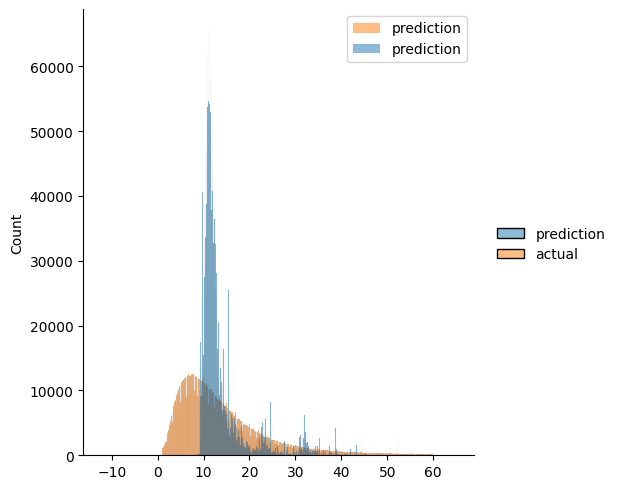

In [13]:
plot_df = pd.DataFrame.from_dict({'prediction': y_pred, 'actual': y_train})
sns.displot(plot_df, label='prediction')

plt.legend()

In [14]:
from sklearn.metrics import root_mean_squared_error

### What's the RMSE on train?

In [15]:
root_mean_squared_error(y_train, y_pred)

7.649261932106969

## Q6. Evaluating the model

In [16]:
X_eval, y_eval = preprocessing_data(yellow_feb)

std of duration: 42.84210176105113
fraction of the records left after dropped the outliers: 0.9800944077722545


/tmp/ipykernel_38527/2058496387.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[categorical_features] = filtered_df[categorical_features].astype(str)


In [17]:
X_eval = dv.transform(X_eval)

In [18]:
y_pred = lr.predict(X_eval)

### What's the RMSE on validation?

In [19]:
root_mean_squared_error(y_eval, y_pred)

7.811818743246608